In [1]:
from modules.OrderedClustering import OrderedClustering
from modules.DataPreprocessor import DataPreprocessor
from modules.ANNModel import ANNModel

In [2]:
import pandas as pd
from keras.callbacks import EarlyStopping

# **Flood Total Duration (Minutes)**

In [3]:
filename = 'dataset/KS_NV_VA_flood_td.csv'
data = pd.read_csv(filename)
data

,State,County,Year,Month,Flood Total Duration (Minutes),DSCI,None,D0,D1,D2,...,Planar Curvature Median,Planar Curvature Pct90,Profile Curvature Min,Profile Curvature Max,Profile Curvature Range,Profile Curvature Mean,Profile Curvature Std,Profile Curvature Sum,Profile Curvature Median,Profile Curvature Pct90
0,KS,Barton County,2010,4,295,56,43.83400,56.16600,0.0,0.0,...,0.0,5.535161e+08,-2.033032e+10,2.102402e+10,4.135434e+10,2.270124e+07,7.794563e+08,7.090000e+13,0.000000e+00,6.554583e+08
1,KS,Dickinson County,2010,4,120,0,100.00000,0.00000,0.0,0.0,...,29858305.0,8.894149e+08,-3.048104e+10,2.831080e+10,5.879184e+10,1.861148e+07,1.240268e+09,5.520000e+13,-9.321468e+06,9.576209e+08
2,KS,Franklin County,2010,4,120,0,100.00000,0.00000,0.0,0.0,...,36672580.0,9.242210e+08,-2.436207e+10,2.771917e+10,5.208125e+10,1.071901e+07,1.575743e+09,2.150000e+13,-3.246536e+07,1.051748e+09
3,KS,Lyon County,2010,4,180,0,100.00000,0.00000,0.0,0.0,...,50985006.0,8.524536e+08,-3.274537e+10,2.691045e+10,5.965581e+10,1.112067e+07,1.310350e+09,3.300000e+13,-4.295902e+07,9.785329e+08
4,KS,Miami County,2010,4,360,0,100.00000,0.00000,0.0,0.0,...,41497608.0,9.827609e+08,-3.408944e+10,3.454475e+10,6.863419e+10,1.186740e+07,1.671318e+09,2.430000e+13,-3.638612e+07,1.154747e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1160,VA,Stafford County,2022,4,0,100,0.00000,100.00000,0.0,0.0,...,6025243.5,3.514870e+09,-3.274471e+10,4.951292e+10,8.225763e+10,1.206386e+08,3.582474e+09,1.170000e+14,2.816871e+06,3.737800e+09
1161,VA,Prince William County,2022,8,0,0,100.00000,0.00000,0.0,0.0,...,6039730.5,2.481283e+09,-4.269882e+10,3.692513e+10,7.962395e+10,8.862024e+07,2.755162e+09,1.070000e+14,4.219818e+06,2.666575e+09
1162,VA,Shenandoah County,2022,10,0,1,98.93871,1.06129,0.0,0.0,...,150947584.0,2.698517e+09,-4.603095e+10,3.734066e+10,8.337161e+10,1.003954e+08,3.024884e+09,1.790000e+14,1.137799e+07,2.915347e+09
1163,VA,Pulaski County,2022,12,0,0,100.00000,0.00000,0.0,0.0,...,233860928.0,4.900697e+09,-5.244661e+10,6.535358e+10,1.180000e+11,2.122855e+08,4.873547e+09,2.380000e+14,0.000000e+00,5.342991e+09


In [4]:
target_col = data['Flood Total Duration (Minutes)']
target_col_name = 'Flood Total Duration (Minutes)'
max_iter = 10
n_init = 100
n_classes = 5

In [5]:
ordered_clustering = OrderedClustering(target_col, max_iter, n_init)

In [6]:
cluster_results, inertia_results = ordered_clustering.clustering()

----------------------------------------
Number of Clusters: 1

Inertia: 13960211347.745916

Silhouette Score: 0 (Only one unique label)

Cluster Centers (sorted by ascending means):
Cluster 1: 955.5802575107294

Sorted and Relabeled Clusters (unique points):
Cluster 1: [0, 1, 11, 22, 25, 27, 30, 32, 33, 36, 37, 42, 43, 45, 52, 53, 55, 56, 60, 61, 63, 64, 65, 69, 70, 72, 73, 75, 80, 81, 84, 85, 86, 87, 89, 90, 93, 95, 96, 100, 103, 104, 105, 107, 108, 110, 113, 119, 120, 123, 125, 126, 130, 131, 134, 135, 136, 138, 139, 140, 143, 144, 145, 147, 149, 150, 152, 154, 155, 158, 160, 161, 162, 165, 169, 170, 171, 172, 175, 176, 177, 180, 183, 185, 186, 187, 190, 191, 195, 196, 198, 200, 205, 207, 210, 211, 212, 217, 219, 220, 221, 225, 232, 235, 237, 238, 240, 241, 245, 249, 252, 254, 255, 256, 258, 260, 264, 265, 266, 270, 277, 278, 280, 281, 282, 284, 285, 287, 288, 290, 292, 295, 297, 298, 299, 300, 302, 305, 306, 309, 311, 315, 317, 320, 322, 325, 330, 331, 333, 337, 345, 352, 358, 360,

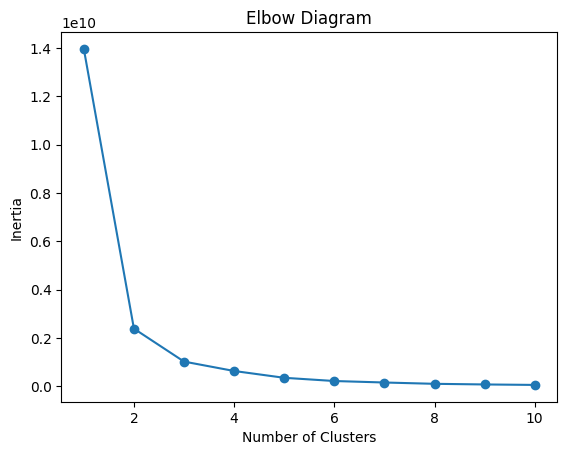

In [7]:
ordered_clustering.elbow_diagram(inertia_results)

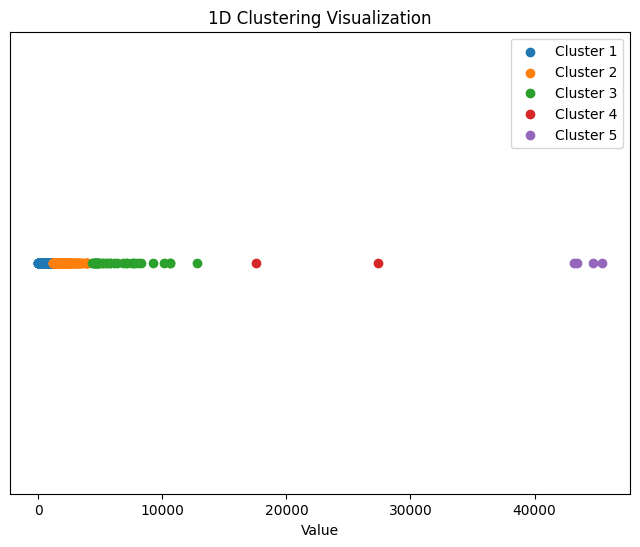

In [8]:
ordered_clustering.plot_clusters(cluster_results[n_classes - 1])

In [9]:
data[target_col_name + ' Relabeled'] = ordered_clustering.relabel(cluster_results[n_classes - 1])
data

,State,County,Year,Month,Flood Total Duration (Minutes),DSCI,None,D0,D1,D2,...,Planar Curvature Pct90,Profile Curvature Min,Profile Curvature Max,Profile Curvature Range,Profile Curvature Mean,Profile Curvature Std,Profile Curvature Sum,Profile Curvature Median,Profile Curvature Pct90,Flood Total Duration (Minutes) Relabeled
0,KS,Barton County,2010,4,295,56,43.83400,56.16600,0.0,0.0,...,5.535161e+08,-2.033032e+10,2.102402e+10,4.135434e+10,2.270124e+07,7.794563e+08,7.090000e+13,0.000000e+00,6.554583e+08,1
1,KS,Dickinson County,2010,4,120,0,100.00000,0.00000,0.0,0.0,...,8.894149e+08,-3.048104e+10,2.831080e+10,5.879184e+10,1.861148e+07,1.240268e+09,5.520000e+13,-9.321468e+06,9.576209e+08,1
2,KS,Franklin County,2010,4,120,0,100.00000,0.00000,0.0,0.0,...,9.242210e+08,-2.436207e+10,2.771917e+10,5.208125e+10,1.071901e+07,1.575743e+09,2.150000e+13,-3.246536e+07,1.051748e+09,1
3,KS,Lyon County,2010,4,180,0,100.00000,0.00000,0.0,0.0,...,8.524536e+08,-3.274537e+10,2.691045e+10,5.965581e+10,1.112067e+07,1.310350e+09,3.300000e+13,-4.295902e+07,9.785329e+08,1
4,KS,Miami County,2010,4,360,0,100.00000,0.00000,0.0,0.0,...,9.827609e+08,-3.408944e+10,3.454475e+10,6.863419e+10,1.186740e+07,1.671318e+09,2.430000e+13,-3.638612e+07,1.154747e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1160,VA,Stafford County,2022,4,0,100,0.00000,100.00000,0.0,0.0,...,3.514870e+09,-3.274471e+10,4.951292e+10,8.225763e+10,1.206386e+08,3.582474e+09,1.170000e+14,2.816871e+06,3.737800e+09,1
1161,VA,Prince William County,2022,8,0,0,100.00000,0.00000,0.0,0.0,...,2.481283e+09,-4.269882e+10,3.692513e+10,7.962395e+10,8.862024e+07,2.755162e+09,1.070000e+14,4.219818e+06,2.666575e+09,1
1162,VA,Shenandoah County,2022,10,0,1,98.93871,1.06129,0.0,0.0,...,2.698517e+09,-4.603095e+10,3.734066e+10,8.337161e+10,1.003954e+08,3.024884e+09,1.790000e+14,1.137799e+07,2.915347e+09,1
1163,VA,Pulaski County,2022,12,0,0,100.00000,0.00000,0.0,0.0,...,4.900697e+09,-5.244661e+10,6.535358e+10,1.180000e+11,2.122855e+08,4.873547e+09,2.380000e+14,0.000000e+00,5.342991e+09,1


In [10]:
for label, cluster in cluster_results[n_classes - 1]:
    print(f"Cluster {label}: {list(cluster)}")

Cluster 1: [0, 1, 11, 22, 25, 27, 30, 32, 33, 36, 37, 42, 43, 45, 52, 53, 55, 56, 60, 61, 63, 64, 65, 69, 70, 72, 73, 75, 80, 81, 84, 85, 86, 87, 89, 90, 93, 95, 96, 100, 103, 104, 105, 107, 108, 110, 113, 119, 120, 123, 125, 126, 130, 131, 134, 135, 136, 138, 139, 140, 143, 144, 145, 147, 149, 150, 152, 154, 155, 158, 160, 161, 162, 165, 169, 170, 171, 172, 175, 176, 177, 180, 183, 185, 186, 187, 190, 191, 195, 196, 198, 200, 205, 207, 210, 211, 212, 217, 219, 220, 221, 225, 232, 235, 237, 238, 240, 241, 245, 249, 252, 254, 255, 256, 258, 260, 264, 265, 266, 270, 277, 278, 280, 281, 282, 284, 285, 287, 288, 290, 292, 295, 297, 298, 299, 300, 302, 305, 306, 309, 311, 315, 317, 320, 322, 325, 330, 331, 333, 337, 345, 352, 358, 360, 365, 370, 374, 375, 377, 379, 383, 385, 389, 390, 392, 395, 397, 400, 405, 407, 408, 410, 411, 412, 420, 428, 429, 430, 435, 443, 449, 458, 459, 460, 462, 467, 468, 475, 480, 485, 487, 488, 491, 498, 505, 510, 511, 515, 517, 521, 525, 530, 535, 537, 540, 545,

In [11]:
data_preprocessor = DataPreprocessor(cluster_results[n_classes - 1], data, target_col_name)

In [12]:
X, y = data_preprocessor.X_and_y()

In [13]:
X

,D2,PCP Value,PCP Rank,PCP Anomaly (1901-2000 base period),1901-2000 PCP Mean,TMAX Value,TMAX Rank,TMAX Anomaly (1901-2000 base period),1901-2000 TMAX Mean,TAVG Value,...,Elevation Mean,Elevation Std,Elevation Median,Elevation Pct90,Flow Accumulation Max,Flow Accumulation Range,Flow Accumulation Mean,Flow Accumulation Std,Curvature Median,Planar Curvature Median
0,0.0,2.66,90,0.5095,2.15,71.1,115,4.991,66.1,58.0,...,574.032385,21.058865,574.706360,602.701050,36641312,36641312,23954.498970,8.496981e+05,0.0,0.0
1,0.0,3.58,96,0.8516,2.73,72.6,121,6.214,66.4,59.4,...,386.285096,23.181583,385.909393,417.176910,65049328,65049328,60401.561880,1.926169e+06,55687500.0,29858305.0
2,0.0,4.98,109,1.4708,3.51,71.6,117,5.613,66.0,60.5,...,302.007346,20.004424,300.665070,328.966251,5516110,5516110,6364.336735,1.552710e+05,93537600.0,36672580.0
3,0.0,3.94,96,0.7867,3.15,71.6,117,5.471,66.1,59.6,...,368.474899,26.604879,364.347610,406.350009,9609596,9609596,9634.641648,2.418372e+05,122172360.0,50985006.0
4,0.0,5.34,110,1.6329,3.71,71.2,118,5.573,65.6,60.1,...,296.324187,22.936582,296.358688,326.757843,9016753,9016753,8613.979411,2.398020e+05,116041992.0,41497608.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1160,0.0,2.52,41,-0.8085,3.33,67.6,79,1.381,66.2,55.6,...,63.059421,32.601488,65.438644,102.809532,5888944,5888944,5049.932356,1.567604e+05,0.0,6025243.5
1161,0.0,2.72,37,-1.5125,4.23,87.5,108,3.221,84.3,77.4,...,80.604158,37.964773,80.855858,117.343395,2082331,2082331,2175.405690,4.701208e+04,0.0,6039730.5
1162,0.0,3.03,78,0.1631,2.87,64.5,29,-2.176,66.7,51.0,...,380.875956,141.846035,340.493256,582.397595,2621880,2621880,5271.271412,1.009348e+05,176515136.0,150947584.0
1163,0.0,3.10,77,0.1863,2.91,44.6,59,-0.009,44.6,34.7,...,665.788261,88.721472,640.285400,798.294971,6691433,6691433,8671.351847,1.985688e+05,310631840.0,233860928.0


In [14]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1160    1
1161    1
1162    1
1163    1
1164    1
Name: Flood Total Duration (Minutes) Relabeled, Length: 1165, dtype: int64

In [15]:
X_train, X_test, y_train, y_test = data_preprocessor.pipeline(X, y)

In [16]:
folder = 'ann_tuning_flood_td'

early_stopping = EarlyStopping(
    monitor='val_accuracy',  # Metric to monitor (e.g., validation loss)
    patience=100,  # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore the weights of the best-performing model
    )

In [17]:
ann_model = ANNModel(n_classes, X_train, X_test, y_train, y_test, folder, early_stopping)

INFO:tensorflow:Reloading Tuner from .\ann_tuning_flood_td\tuner0.json
INFO:tensorflow:Oracle triggered exit
Results summary
Results in .\ann_tuning_flood_td
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 09 summary
Hyperparameters:
num_layers: 4
units_0: 416
activation: relu
learning_rate: 0.01
units_1: 160
units_2: 96
units_3: 192
units_4: 320
Score: 0.801714289188385

Trial 06 summary
Hyperparameters:
num_layers: 2
units_0: 128
activation: relu
learning_rate: 0.01
units_1: 32
units_2: 192
units_3: 32
units_4: 288
Score: 0.7988571405410767

Trial 07 summary
Hyperparameters:
num_layers: 1
units_0: 288
activation: relu
learning_rate: 0.1
units_1: 64
units_2: 192
units_3: 256
units_4: 320
Score: 0.7908571600914002

Trial 08 summary
Hyperparameters:
num_layers: 1
units_0: 256
activation: tanh
learning_rate: 0.1
units_1: 416
units_2: 352
units_3: 96
units_4: 416
Score: 0.775428569316864

Trial 05 summary
Hyperparameters:
num_layers: 2
units_0: 96
activation:

In [18]:
ann_model.train_and_predict()

Epoch 1/200
4/4 [==============================] - 1s 92ms/step - loss: 1.2488 - accuracy: 0.4661 - val_loss: 1.2226 - val_accuracy: 0.5057
Epoch 2/200
4/4 [==============================] - 0s 14ms/step - loss: 0.6136 - accuracy: 0.6956 - val_loss: 0.7317 - val_accuracy: 0.7257
Epoch 3/200
4/4 [==============================] - 0s 15ms/step - loss: 0.4399 - accuracy: 0.7935 - val_loss: 0.9744 - val_accuracy: 0.5514
Epoch 4/200
4/4 [==============================] - 0s 16ms/step - loss: 0.3141 - accuracy: 0.8560 - val_loss: 0.8649 - val_accuracy: 0.7657
Epoch 5/200
4/4 [==============================] - 0s 16ms/step - loss: 0.2714 - accuracy: 0.8956 - val_loss: 1.6153 - val_accuracy: 0.6657
Epoch 6/200
4/4 [==============================] - 0s 18ms/step - loss: 0.2496 - accuracy: 0.9015 - val_loss: 1.4261 - val_accuracy: 0.5886
Epoch 7/200
4/4 [==============================] - 0s 17ms/step - loss: 0.2171 - accuracy: 0.9091 - val_loss: 1.2973 - val_accuracy: 0.5943
Epoch 8/200
4/4 [===

In [19]:
ann_model.evaluate()

11/11 [==============================] - 0s 2ms/step - loss: 7.4597 - accuracy: 0.7857
Test Loss: 7.459734916687012
Test Accuracy: 0.7857142686843872


In [20]:
ann_model.scores()

Accuracy: 0.7857142857142857
Precision: 0.3671704960919491
Recall: 0.3944817300521999
F1-Score: 0.37420042395039593


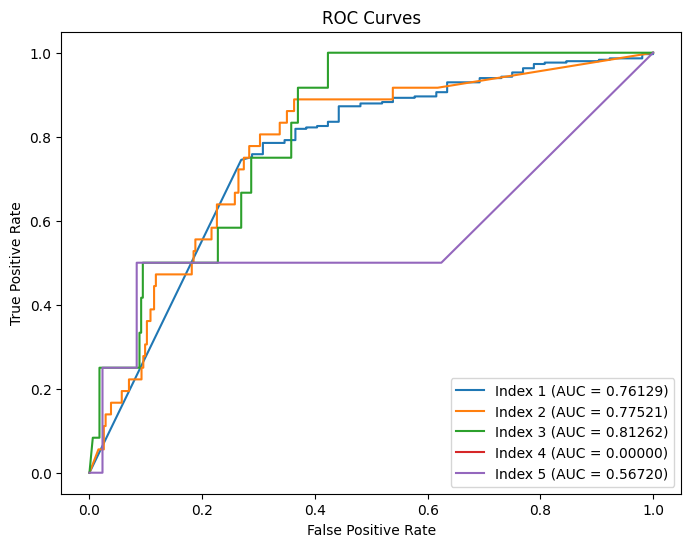

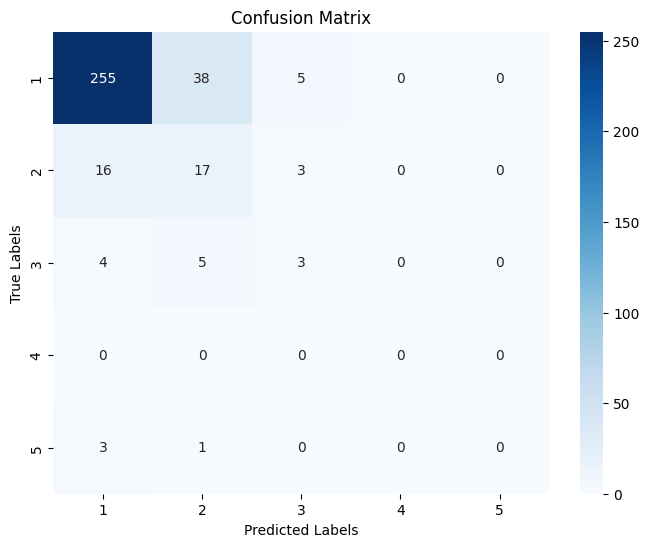

In [21]:
ann_model.figures()